In [1]:
import tensorflow as tf 
from sklearn.datasets import load_iris

### At first we shall load the model


In [6]:
load_iris().keys() #from this we can understand these are just dict with values 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data = load_iris()["data"] # extracting data X
target = load_iris()['target'] # extracting Y 
target_names = load_iris()['target_names']

In [23]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data.shape # here we can see that there are 4 fields so the first layer should have 4 neurons (first layer means input layer)

(150, 4)

In [29]:
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(data, target, train_size=0.8)

### Lets build our model

In [24]:
model = tf.keras.Sequential([                   # sequential is like sandwich bread that consist of all neurons inside it 
            tf.keras.layers.Dense(units=1024, activation= "relu", input_dim = data.shape[1] ), # mostly stick with relu 
            tf.keras.layers.Dense(units= 1024, activation= "relu"), 
            tf.keras.layers.Dense(units=3, activation="softmax") # softmax is used to give prob values for all 3 neurons
])

In [26]:
model.summary() # to see our model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              5120      
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 1,057,795
Trainable params: 1,057,795
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics= ["accuracy"])  
# for label encoding use sparse_categorical, for one hot use categorical_crossentropy, for 2 target use binary_crossentropy, for regression use mse 
# optimizer is used for backprop use ADAM it is og optimizer 
# metrics is the one that u see in the training time (eg.., loss: 0.0763 - accuracy: 0.9667 - val_loss: 0.0193 - val_accuracy: 1.0000)

In [ ]:
hist = model.fit(X_train, Y_train, validation_data= (X_val, Y_val), epochs=100, batch_size=(64)) 

# epochs - one complete cycle of dataset
# batch - Many batchs gives one epochs 

# consider if dataset have 640 rows of data and batch size is 64 
# so now there are 10 batches to complete one epochs 
# when one epochs is done the model is trained with 640 rows on second epoch same 640 rows is used 

Epoch 1/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0626 - accuracy: 0.9833 - val_loss: 0.0633 - val_accuracy: 0.9667
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 0.0366 - val_accuracy: 0.9667
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0573 - accuracy: 0.9750 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0679 - accuracy: 0.9750 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0588 - accuracy: 0.9750 - val_loss: 0.0580 - val_accuracy: 0.9667
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0668 - accuracy: 0.9750 - val_loss: 0.0308 - val_accuracy: 0.9667
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0568 - accuracy: 0.9833 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 8/100
2/2 [===

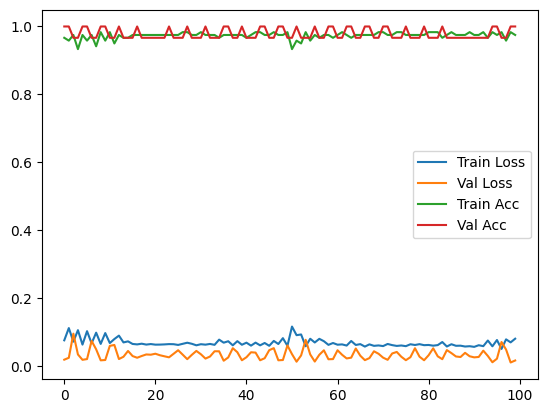

In [44]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history.get('val_loss'), label='Val Loss')
plt.plot(hist.history['accuracy'], label='Train Acc')
plt.plot(hist.history.get('val_accuracy'), label='Val Acc')
plt.legend()
plt.show()


In [33]:
X_train[0], Y_train[0]

(array([5.4, 3. , 4.5, 1.5]), 1)

In [39]:
import numpy as np 
val = model.predict([[5.4, 3. , 4.5, 1.5]])
index = np.argmax(val)
print(f"the result for X_train[0] is {target_names[index]}")

1/1 [==============================] - 0s 31ms/step
the result for X_train[0] is versicolor
